# LightGBM
### Parameters:
System:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
    * **speed** (*land speed*)
        * **other speeds**: fly, climb, swim
    * **num immunities**
    * **resistances**: fire, cold, electricity, acid, piercing, slashing, physical, bludgeoning, mental, poison, all-damage
    * **weaknesses**: cold-iron, good, fire, cold, area-damage, splash-damage, evil, slashing
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

Items
* **items**
    * **melee**
    * **ranged**
    * **spells nr**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "pathfinder-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
    "land_speed",
    "num_immunities",
    "fly",
    "swim",
    "climb",
    "fire_resistance",
    "cold_resistance",
    "electricity_resistance",
    "acid_resistance",
    "piercing_resistance",
    "slashing_resistance",
    "physical_resistance",
    "bludgeoning_resistance",
    "mental_resistance",
    "poison_resistance",
    "all-damage_resistance",
    "cold-iron_weakness",
    "good_weakness",
    "fire_weakness",
    "cold_weakness",
    "area-damage_weakness",
    "splash-damage_weakness",
    "evil_weakness",
    "slashing_weakness",
    "melee",
    "ranged",
    "spells",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 4327
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   land_speed              3690 non-null   float64
 1   dex                     3690 non-null   float64
 2   focus                   3690 non-null   int32  
 3   perception              3690 non-null   float64
 4   cha                     3690 non-null   float64
 5   num_immunities          3690 non-null   int64  
 6   hp                      3690 non-null   int64  
 7   fortitude               3690 non-null   float64
 8   will                    3690 non-null   float64
 9   str                     3690 non-null   float64
 10  reflex                  3690 non-null   float64
 11  book                    3690 non-null   object 
 12  wis                     3690 non-null   float64
 13  ac                      3690 non-null   float64
 14  con                     3690 non-null   

In [3]:
df.head()

,land_speed,dex,focus,perception,cha,num_immunities,hp,fortitude,will,str,...,spells_nr_lvl_4,spells_nr_lvl_5,spells_nr_lvl_6,spells_nr_lvl_7,spells_nr_lvl_8,spells_nr_lvl_9,melee_max_bonus,avg_melee_dmg,ranged_max_bonus,avg_ranged_dmg
0,20.0,3.0,1,18.0,0.0,5,155,15.0,20.0,6.0,...,2,0,0,0,0,0,21,19.0,0,0.0
1,40.0,3.0,0,19.0,0.0,0,175,22.0,19.0,7.0,...,0,0,0,0,0,0,23,22.0,0,0.0
2,30.0,3.0,0,7.0,1.0,0,38,7.0,9.0,4.0,...,0,0,0,0,0,0,9,6.5,8,6.5
3,30.0,4.0,0,16.0,1.0,0,140,17.0,15.0,3.0,...,0,0,0,0,0,0,20,18.0,20,9.5
4,0.0,6.0,0,20.0,2.0,1,90,14.0,18.0,-5.0,...,0,0,0,0,0,0,17,21.5,0,0.0


###### Level

In [4]:
y = df["level"]
y

0        9
1       10
2        2
3        8
4        9
        ..
4322     2
4324     3
4325     4
4326     2
4327     2
Name: level, Length: 3690, dtype: int64

In [5]:
from collections import defaultdict


lvl_stat = defaultdict(lambda: 0)

for lvl in y:
    lvl_stat[lvl] += 1

In [6]:
level_count = pd.DataFrame(
    data={
        "lvl": [key for key in sorted(lvl_stat.keys())],
        "count": [lvl_stat.get(key) for key in sorted(lvl_stat.keys())],
    }
)
level_count

,lvl,count
0,-1,147
1,0,87
2,1,320
3,2,335
4,3,339
5,4,274
6,5,268
7,6,220
8,7,215
9,8,188


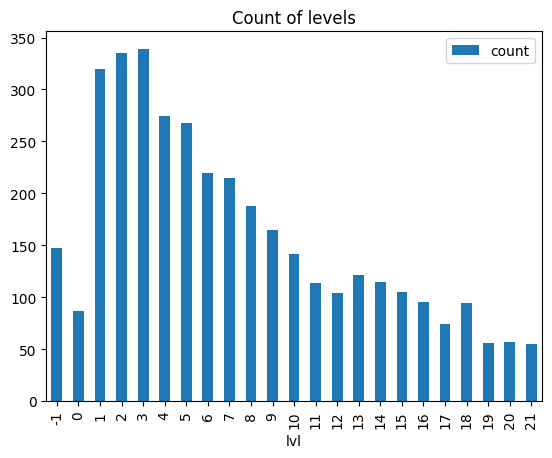

In [7]:
import matplotlib.pyplot as plt


level_count.plot.bar(x="lvl", y="count", title="Count of levels")
plt.show()

## Train test split

### Chronological split

In [8]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/lightgbm")

In [9]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

### Random split

In [10]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [11]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## LightGBM

## Chronological split

In [12]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 50
[LightGBM] [Info] Start training from score 7.212177
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.355465	valid_0's l1: 0.355989


In [13]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.60
MAE: 0.36


In [15]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "full", rmse, mae]

In [16]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 0.17
RMSE test: 0.60


###### MAE by level

In [17]:
from training.results import plot_mae_by_level

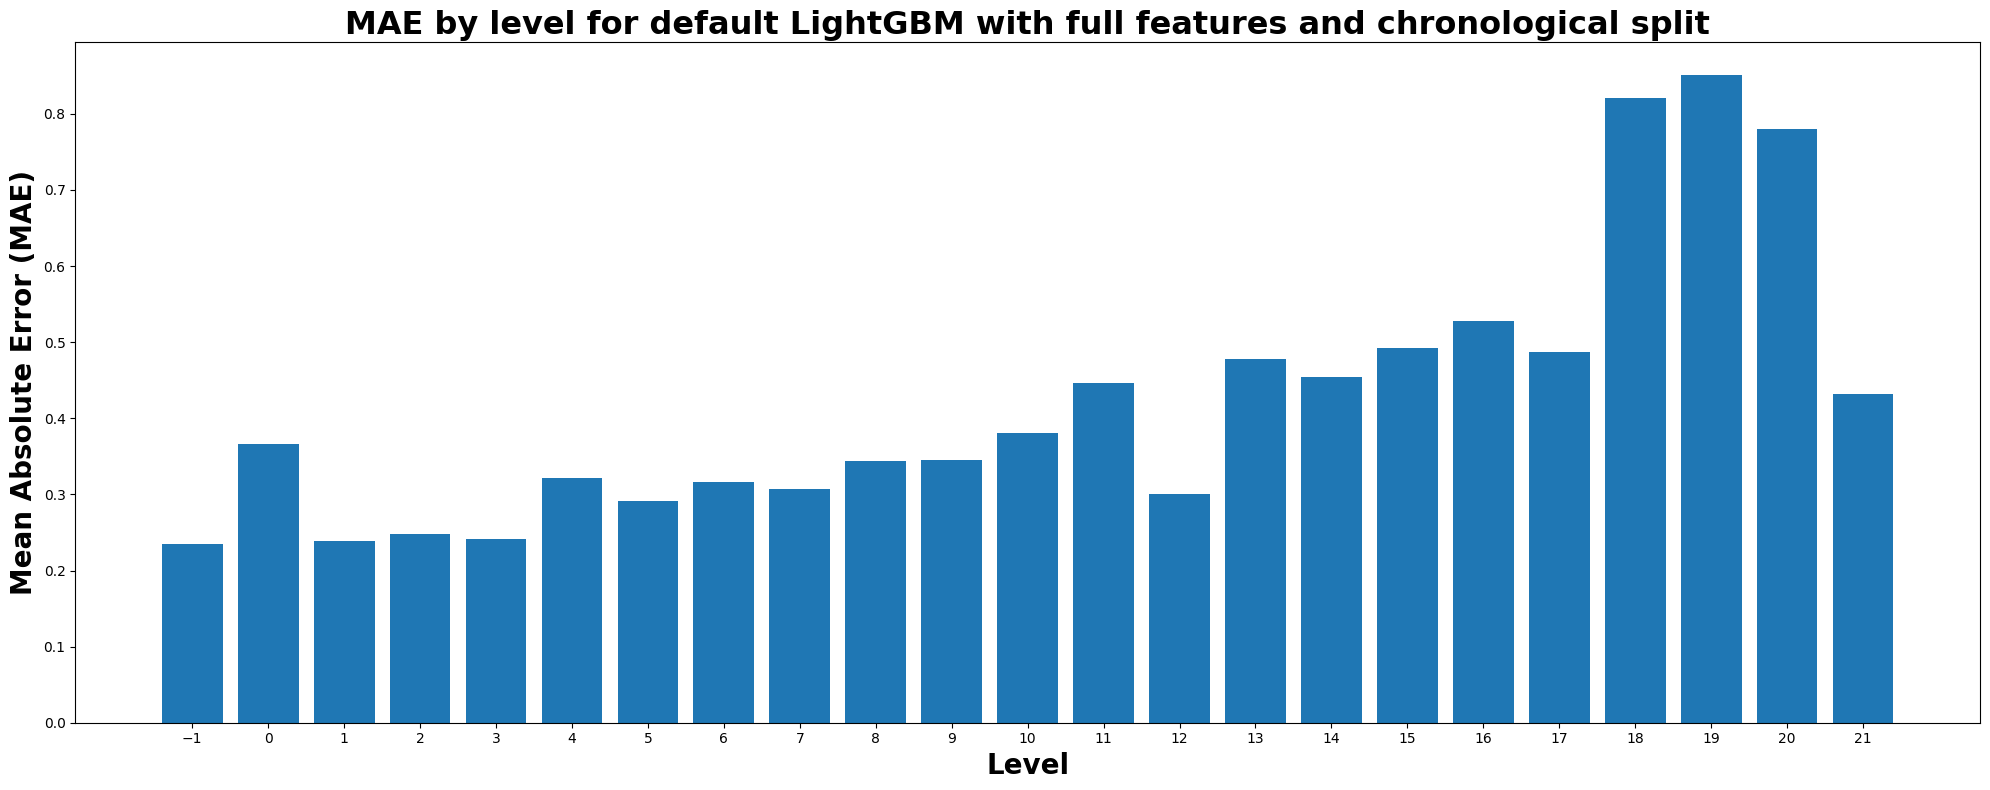

In [18]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and chronological split",
)

In [19]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.60

Round type: 0.5
RMSE: 0.63

Round type: 0.33
RMSE: 0.64

Round type: 0.45
RMSE: 0.62



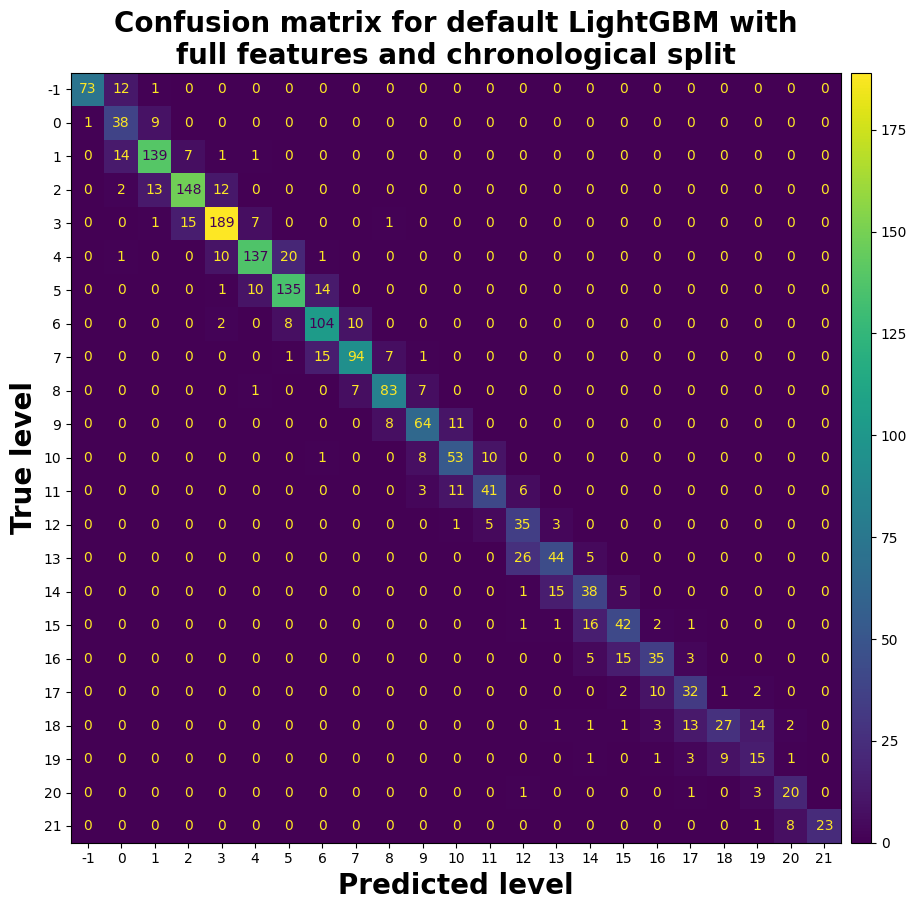

In [20]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default LightGBM with\nfull features and chronological split",
)

#### Tuning

In [21]:
from training.results import assess_regression_model

In [22]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-26 20:15:40,431] A new study created in memory with name: no-name-a1b6a7cd-4606-4b91-8e93-a1d495375d12
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.18148 + 0.130157
[200]	cv_agg's l2: 0.177757 + 0.125554
[300]	cv_agg's l2: 0.177647 + 0.124477


feature_fraction, val_score: 0.177456:  14%|#4        | 1/7 [00:06<00:38,  6.42s/it]

Early stopping, best iteration is:
[243]	cv_agg's l2: 0.177456 + 0.125183
[100]	cv_agg's l2: 0.183532 + 0.126236
[200]	cv_agg's l2: 0.180297 + 0.122901
[300]	cv_agg's l2: 0.180316 + 0.121803


feature_fraction, val_score: 0.177456:  29%|##8       | 2/7 [00:14<00:35,  7.19s/it]

Early stopping, best iteration is:
[243]	cv_agg's l2: 0.177456 + 0.125183
[100]	cv_agg's l2: 0.177853 + 0.1225
[200]	cv_agg's l2: 0.175527 + 0.119636


feature_fraction, val_score: 0.175213:  43%|####2     | 3/7 [00:20<00:27,  6.90s/it]

Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804
[100]	cv_agg's l2: 0.184069 + 0.123131
[200]	cv_agg's l2: 0.179611 + 0.117875


feature_fraction, val_score: 0.175213:  57%|#####7    | 4/7 [00:24<00:17,  5.80s/it]

Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804
[100]	cv_agg's l2: 0.194983 + 0.12728
[200]	cv_agg's l2: 0.191755 + 0.121835


feature_fraction, val_score: 0.175213:  71%|#######1  | 5/7 [00:29<00:10,  5.30s/it]

Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804
[100]	cv_agg's l2: 0.187998 + 0.130665
[200]	cv_agg's l2: 0.1838 + 0.126228


feature_fraction, val_score: 0.175213:  86%|########5 | 6/7 [00:33<00:04,  4.90s/it]

Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804
[100]	cv_agg's l2: 0.190616 + 0.127177
[200]	cv_agg's l2: 0.184314 + 0.121842


feature_fraction, val_score: 0.175213: 100%|##########| 7/7 [00:38<00:00,  5.44s/it]


Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804


num_leaves, val_score: 0.175213:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395


num_leaves, val_score: 0.175213:   5%|5         | 1/20 [00:07<02:25,  7.68s/it]

Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395


num_leaves, val_score: 0.175213:  10%|#         | 2/20 [00:14<02:07,  7.08s/it]

Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395


num_leaves, val_score: 0.175213:  15%|#5        | 3/20 [00:21<02:03,  7.27s/it]

Early stopping, best iteration is:
[188]	cv_agg's l2: 0.175213 + 0.119804
[100]	cv_agg's l2: 0.184141 + 0.119876
[200]	cv_agg's l2: 0.169271 + 0.109551
[300]	cv_agg's l2: 0.166122 + 0.106604


num_leaves, val_score: 0.165810:  20%|##        | 4/20 [00:24<01:25,  5.31s/it]

[400]	cv_agg's l2: 0.166328 + 0.105611
Early stopping, best iteration is:
[321]	cv_agg's l2: 0.16581 + 0.106442
[100]	cv_agg's l2: 0.184141 + 0.119876
[200]	cv_agg's l2: 0.169271 + 0.109551
[300]	cv_agg's l2: 0.166122 + 0.106604


num_leaves, val_score: 0.165810:  25%|##5       | 5/20 [00:26<01:03,  4.24s/it]

[400]	cv_agg's l2: 0.166328 + 0.105611
Early stopping, best iteration is:
[321]	cv_agg's l2: 0.16581 + 0.106442
[100]	cv_agg's l2: 0.359849 + 0.138903
[200]	cv_agg's l2: 0.302087 + 0.121707
[300]	cv_agg's l2: 0.287183 + 0.118713


num_leaves, val_score: 0.165810:  30%|###       | 6/20 [00:27<00:45,  3.22s/it]

[400]	cv_agg's l2: 0.278248 + 0.115583
Early stopping, best iteration is:
[321]	cv_agg's l2: 0.16581 + 0.106442
[100]	cv_agg's l2: 0.188346 + 0.119045
[200]	cv_agg's l2: 0.169128 + 0.105492
[300]	cv_agg's l2: 0.164287 + 0.100916
[400]	cv_agg's l2: 0.163363 + 0.0997341
[500]	cv_agg's l2: 0.162778 + 0.0991834


num_leaves, val_score: 0.162556:  35%|###5      | 7/20 [00:30<00:40,  3.12s/it]

[600]	cv_agg's l2: 0.162746 + 0.0992998
Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395
[300]	cv_agg's l2: 0.180233 + 0.111932
[400]	cv_agg's l2: 0.181227 + 0.110691
[500]	cv_agg's l2: 0.182013 + 0.110189
[600]	cv_agg's l2: 0.182678 + 0.109871


num_leaves, val_score: 0.162556:  40%|####      | 8/20 [00:43<01:16,  6.35s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395
[300]	cv_agg's l2: 0.180233 + 0.111932
[400]	cv_agg's l2: 0.181227 + 0.110691
[500]	cv_agg's l2: 0.182013 + 0.110189
[600]	cv_agg's l2: 0.182678 + 0.109871


num_leaves, val_score: 0.162556:  45%|####5     | 9/20 [00:59<01:42,  9.36s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.182288 + 0.120088
[200]	cv_agg's l2: 0.179588 + 0.114093
[300]	cv_agg's l2: 0.180166 + 0.112154
[400]	cv_agg's l2: 0.180813 + 0.111721
[500]	cv_agg's l2: 0.181417 + 0.111205
[600]	cv_agg's l2: 0.181992 + 0.110974


num_leaves, val_score: 0.162556:  50%|#####     | 10/20 [01:12<01:44, 10.43s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395
[300]	cv_agg's l2: 0.180233 + 0.111932
[400]	cv_agg's l2: 0.181227 + 0.110691
[500]	cv_agg's l2: 0.182013 + 0.110189
[600]	cv_agg's l2: 0.182678 + 0.109871


num_leaves, val_score: 0.162556:  55%|#####5    | 11/20 [01:26<01:42, 11.36s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.181587 + 0.122638
[200]	cv_agg's l2: 0.176752 + 0.116821
[300]	cv_agg's l2: 0.176803 + 0.116243
[400]	cv_agg's l2: 0.177519 + 0.115373
[500]	cv_agg's l2: 0.177869 + 0.114876
[600]	cv_agg's l2: 0.178166 + 0.114745


num_leaves, val_score: 0.162556:  60%|######    | 12/20 [01:36<01:29, 11.15s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395
[300]	cv_agg's l2: 0.180233 + 0.111932
[400]	cv_agg's l2: 0.181227 + 0.110691
[500]	cv_agg's l2: 0.182013 + 0.110189
[600]	cv_agg's l2: 0.182678 + 0.109871


num_leaves, val_score: 0.162556:  65%|######5   | 13/20 [01:53<01:30, 12.89s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.185977 + 0.128318
[200]	cv_agg's l2: 0.182455 + 0.122674
[300]	cv_agg's l2: 0.18252 + 0.120447
[400]	cv_agg's l2: 0.183117 + 0.119455
[500]	cv_agg's l2: 0.183494 + 0.11892
[600]	cv_agg's l2: 0.183851 + 0.118743


num_leaves, val_score: 0.162556:  70%|#######   | 14/20 [02:06<01:16, 12.71s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.218246 + 0.126395
[200]	cv_agg's l2: 0.191989 + 0.114032
[300]	cv_agg's l2: 0.179496 + 0.1068
[400]	cv_agg's l2: 0.174396 + 0.103021
[500]	cv_agg's l2: 0.172101 + 0.0994534


num_leaves, val_score: 0.162556:  75%|#######5  | 15/20 [02:08<00:48,  9.60s/it]

[600]	cv_agg's l2: 0.170654 + 0.0978938
Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.276339 + 0.138417
[200]	cv_agg's l2: 0.238881 + 0.123767
[300]	cv_agg's l2: 0.219848 + 0.116721
[400]	cv_agg's l2: 0.207106 + 0.110522
[500]	cv_agg's l2: 0.199309 + 0.105713


num_leaves, val_score: 0.162556:  80%|########  | 16/20 [02:10<00:28,  7.22s/it]

[600]	cv_agg's l2: 0.193529 + 0.102443
Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.185977 + 0.128318
[200]	cv_agg's l2: 0.182455 + 0.122674
[300]	cv_agg's l2: 0.18252 + 0.120447
[400]	cv_agg's l2: 0.183117 + 0.119455
[500]	cv_agg's l2: 0.183494 + 0.11892
[600]	cv_agg's l2: 0.183851 + 0.118743


num_leaves, val_score: 0.162556:  85%|########5 | 17/20 [02:28<00:31, 10.60s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395
[300]	cv_agg's l2: 0.180233 + 0.111932
[400]	cv_agg's l2: 0.181227 + 0.110691
[500]	cv_agg's l2: 0.182013 + 0.110189
[600]	cv_agg's l2: 0.182678 + 0.109871


num_leaves, val_score: 0.162556:  90%|######### | 18/20 [02:46<00:25, 12.85s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.180883 + 0.118381
[200]	cv_agg's l2: 0.175733 + 0.113595
[300]	cv_agg's l2: 0.176195 + 0.113253
[400]	cv_agg's l2: 0.177389 + 0.113397
[500]	cv_agg's l2: 0.178427 + 0.113
[600]	cv_agg's l2: 0.179506 + 0.112916


num_leaves, val_score: 0.162556:  95%|#########5| 19/20 [02:55<00:11, 11.72s/it]

Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.183848 + 0.120828
[200]	cv_agg's l2: 0.180185 + 0.11395
[300]	cv_agg's l2: 0.180233 + 0.111932
[400]	cv_agg's l2: 0.181227 + 0.110691
[500]	cv_agg's l2: 0.182013 + 0.110189
[600]	cv_agg's l2: 0.182678 + 0.109871


num_leaves, val_score: 0.162556: 100%|##########| 20/20 [03:13<00:00,  9.67s/it]


Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727


bagging, val_score: 0.162556:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.213299 + 0.127964
[200]	cv_agg's l2: 0.194079 + 0.112738
[300]	cv_agg's l2: 0.191586 + 0.109354
[400]	cv_agg's l2: 0.187167 + 0.107012
[500]	cv_agg's l2: 0.188486 + 0.10521


bagging, val_score: 0.162556:  10%|#         | 1/10 [00:04<00:38,  4.29s/it]

[600]	cv_agg's l2: 0.184719 + 0.101842
Early stopping, best iteration is:
[522]	cv_agg's l2: 0.162556 + 0.0988727
[100]	cv_agg's l2: 0.191766 + 0.115703
[200]	cv_agg's l2: 0.171091 + 0.104916
[300]	cv_agg's l2: 0.165376 + 0.101906
[400]	cv_agg's l2: 0.162882 + 0.100921
[500]	cv_agg's l2: 0.161114 + 0.0990447


bagging, val_score: 0.160904:  20%|##        | 2/10 [00:07<00:30,  3.87s/it]

Early stopping, best iteration is:
[493]	cv_agg's l2: 0.160904 + 0.0991975
[100]	cv_agg's l2: 0.191783 + 0.120422
[200]	cv_agg's l2: 0.17394 + 0.108371
[300]	cv_agg's l2: 0.167931 + 0.104347
[400]	cv_agg's l2: 0.165788 + 0.103016
[500]	cv_agg's l2: 0.165166 + 0.101384


bagging, val_score: 0.160904:  30%|###       | 3/10 [00:12<00:28,  4.06s/it]

Early stopping, best iteration is:
[493]	cv_agg's l2: 0.160904 + 0.0991975
[100]	cv_agg's l2: 0.188346 + 0.119045
[200]	cv_agg's l2: 0.169128 + 0.105492
[300]	cv_agg's l2: 0.164287 + 0.100916
[400]	cv_agg's l2: 0.163363 + 0.0997341
[500]	cv_agg's l2: 0.162778 + 0.0991834


bagging, val_score: 0.160904:  40%|####      | 4/10 [00:16<00:24,  4.14s/it]

Early stopping, best iteration is:
[493]	cv_agg's l2: 0.160904 + 0.0991975
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


bagging, val_score: 0.157815:  50%|#####     | 5/10 [00:20<00:20,  4.17s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.18684 + 0.118129
[200]	cv_agg's l2: 0.168052 + 0.106073
[300]	cv_agg's l2: 0.164149 + 0.103228
[400]	cv_agg's l2: 0.16243 + 0.101709
[500]	cv_agg's l2: 0.161903 + 0.100167


bagging, val_score: 0.157815:  60%|######    | 6/10 [00:24<00:16,  4.13s/it]

[600]	cv_agg's l2: 0.162096 + 0.0989991
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.186642 + 0.112979
[200]	cv_agg's l2: 0.168937 + 0.102702
[300]	cv_agg's l2: 0.163353 + 0.0975679
[400]	cv_agg's l2: 0.162503 + 0.0969956
[500]	cv_agg's l2: 0.162189 + 0.0950971


bagging, val_score: 0.157815:  70%|#######   | 7/10 [00:28<00:12,  4.17s/it]

[600]	cv_agg's l2: 0.162227 + 0.0944771
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183931 + 0.120479
[200]	cv_agg's l2: 0.165932 + 0.106796
[300]	cv_agg's l2: 0.161729 + 0.102904
[400]	cv_agg's l2: 0.159331 + 0.101685
[500]	cv_agg's l2: 0.158898 + 0.101122


bagging, val_score: 0.157815:  80%|########  | 8/10 [00:32<00:08,  4.01s/it]

[600]	cv_agg's l2: 0.159525 + 0.101052
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.18596 + 0.111655
[200]	cv_agg's l2: 0.168452 + 0.100132
[300]	cv_agg's l2: 0.164714 + 0.096917
[400]	cv_agg's l2: 0.163333 + 0.0959555
[500]	cv_agg's l2: 0.162695 + 0.0953662


bagging, val_score: 0.157815:  90%|######### | 9/10 [00:35<00:03,  3.78s/it]

[600]	cv_agg's l2: 0.161903 + 0.0950386
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.190769 + 0.118154
[200]	cv_agg's l2: 0.173315 + 0.107519
[300]	cv_agg's l2: 0.167874 + 0.10598
[400]	cv_agg's l2: 0.165768 + 0.102978
[500]	cv_agg's l2: 0.166943 + 0.102336


bagging, val_score: 0.157815: 100%|##########| 10/10 [00:38<00:00,  3.89s/it]


[600]	cv_agg's l2: 0.166813 + 0.101464
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399


feature_fraction_stage2, val_score: 0.157815:   0%|          | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.212473 + 0.136956
[200]	cv_agg's l2: 0.188138 + 0.122581
[300]	cv_agg's l2: 0.180489 + 0.116895
[400]	cv_agg's l2: 0.178431 + 0.11325
[500]	cv_agg's l2: 0.175927 + 0.111272


feature_fraction_stage2, val_score: 0.157815:  17%|#6        | 1/6 [00:03<00:15,  3.18s/it]

[600]	cv_agg's l2: 0.175207 + 0.111403
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.186932 + 0.120991
[200]	cv_agg's l2: 0.168188 + 0.107377
[300]	cv_agg's l2: 0.163197 + 0.104525
[400]	cv_agg's l2: 0.161831 + 0.104096
[500]	cv_agg's l2: 0.161106 + 0.104003


feature_fraction_stage2, val_score: 0.157815:  33%|###3      | 2/6 [00:06<00:12,  3.01s/it]

[600]	cv_agg's l2: 0.160317 + 0.103599
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.215824 + 0.139791
[200]	cv_agg's l2: 0.190216 + 0.122811
[300]	cv_agg's l2: 0.181745 + 0.116038
[400]	cv_agg's l2: 0.178147 + 0.113148
[500]	cv_agg's l2: 0.175715 + 0.111648


feature_fraction_stage2, val_score: 0.157815:  50%|#####     | 3/6 [00:10<00:10,  3.47s/it]

[600]	cv_agg's l2: 0.174434 + 0.108731
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.189473 + 0.128178
[200]	cv_agg's l2: 0.171778 + 0.118392
[300]	cv_agg's l2: 0.169098 + 0.116498
[400]	cv_agg's l2: 0.167717 + 0.115335
[500]	cv_agg's l2: 0.166854 + 0.113845


feature_fraction_stage2, val_score: 0.157815:  67%|######6   | 4/6 [00:13<00:06,  3.31s/it]

[600]	cv_agg's l2: 0.167371 + 0.113397
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.189789 + 0.120653
[200]	cv_agg's l2: 0.171808 + 0.10776
[300]	cv_agg's l2: 0.168584 + 0.105291
[400]	cv_agg's l2: 0.166589 + 0.103697
[500]	cv_agg's l2: 0.165985 + 0.103567


feature_fraction_stage2, val_score: 0.157815:  83%|########3 | 5/6 [00:16<00:03,  3.37s/it]

[600]	cv_agg's l2: 0.165124 + 0.103413
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.184851 + 0.118931
[200]	cv_agg's l2: 0.168238 + 0.109793
[300]	cv_agg's l2: 0.163275 + 0.105252
[400]	cv_agg's l2: 0.16174 + 0.102979
[500]	cv_agg's l2: 0.161744 + 0.102603


feature_fraction_stage2, val_score: 0.157815: 100%|##########| 6/6 [00:19<00:00,  3.26s/it]


[600]	cv_agg's l2: 0.162092 + 0.101383
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399


regularization_factors, val_score: 0.157815:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.184289 + 0.115901
[200]	cv_agg's l2: 0.165558 + 0.107454
[300]	cv_agg's l2: 0.161155 + 0.103454
[400]	cv_agg's l2: 0.159978 + 0.101847
[500]	cv_agg's l2: 0.158963 + 0.101331


regularization_factors, val_score: 0.157815:   5%|5         | 1/20 [00:03<00:59,  3.16s/it]

[600]	cv_agg's l2: 0.159844 + 0.100903
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.184457 + 0.115814
[200]	cv_agg's l2: 0.16681 + 0.106665
[300]	cv_agg's l2: 0.161737 + 0.103555
[400]	cv_agg's l2: 0.161563 + 0.102495
[500]	cv_agg's l2: 0.160936 + 0.101447


regularization_factors, val_score: 0.157815:  10%|#         | 2/20 [00:06<00:54,  3.02s/it]

[600]	cv_agg's l2: 0.161465 + 0.101258
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  15%|#5        | 3/20 [00:09<00:53,  3.13s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  20%|##        | 4/20 [00:12<00:49,  3.11s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  25%|##5       | 5/20 [00:15<00:46,  3.11s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  30%|###       | 6/20 [00:18<00:44,  3.18s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  35%|###5      | 7/20 [00:21<00:40,  3.15s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  40%|####      | 8/20 [00:24<00:37,  3.12s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  45%|####5     | 9/20 [00:27<00:33,  3.07s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  50%|#####     | 10/20 [00:31<00:30,  3.09s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  55%|#####5    | 11/20 [00:34<00:28,  3.14s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  60%|######    | 12/20 [00:37<00:25,  3.19s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  65%|######5   | 13/20 [00:42<00:24,  3.55s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973592


regularization_factors, val_score: 0.157815:  70%|#######   | 14/20 [00:46<00:23,  3.94s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399


[I 2023-11-26 20:21:17,225] Trial 56 finished with value: 0.15781494174455862 and parameters: {'lambda_l1': 5.493954526536644e-07, 'lambda_l2': 1.7605280690928667e-07}. Best is trial 56 with value: 0.15781494174455862.
regularization_factors, val_score: 0.157815:  70%|#######   | 14/20 [00:46<00:23,  3.94s/it]

[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973593


regularization_factors, val_score: 0.157815:  75%|#######5  | 15/20 [00:50<00:19,  3.81s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973593


regularization_factors, val_score: 0.157815:  80%|########  | 16/20 [00:54<00:16,  4.05s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973593


regularization_factors, val_score: 0.157815:  85%|########5 | 17/20 [00:58<00:11,  3.93s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973593


regularization_factors, val_score: 0.157815:  90%|######### | 18/20 [01:02<00:08,  4.01s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973593


regularization_factors, val_score: 0.157815:  95%|#########5| 19/20 [01:05<00:03,  3.74s/it]

[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183654 + 0.116273
[200]	cv_agg's l2: 0.165588 + 0.104651
[300]	cv_agg's l2: 0.159935 + 0.0994812
[400]	cv_agg's l2: 0.158441 + 0.0976891
[500]	cv_agg's l2: 0.1581 + 0.0973593


regularization_factors, val_score: 0.157815: 100%|##########| 20/20 [01:09<00:00,  3.47s/it]


[600]	cv_agg's l2: 0.158025 + 0.0966502
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399


min_data_in_leaf, val_score: 0.157815:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.182324 + 0.112949
[200]	cv_agg's l2: 0.167037 + 0.10645
[300]	cv_agg's l2: 0.163998 + 0.104124
[400]	cv_agg's l2: 0.162949 + 0.105209
[500]	cv_agg's l2: 0.16264 + 0.105265


min_data_in_leaf, val_score: 0.157815:  20%|##        | 1/5 [00:03<00:13,  3.38s/it]

[600]	cv_agg's l2: 0.162229 + 0.105416
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.307215 + 0.154175
[200]	cv_agg's l2: 0.286734 + 0.150671
[300]	cv_agg's l2: 0.279793 + 0.147564
[400]	cv_agg's l2: 0.27783 + 0.146781
[500]	cv_agg's l2: 0.276847 + 0.145941


min_data_in_leaf, val_score: 0.157815:  40%|####      | 2/5 [00:06<00:09,  3.29s/it]

[600]	cv_agg's l2: 0.278256 + 0.144542
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.183227 + 0.11729
[200]	cv_agg's l2: 0.16865 + 0.107545
[300]	cv_agg's l2: 0.165228 + 0.105421
[400]	cv_agg's l2: 0.164988 + 0.104768
[500]	cv_agg's l2: 0.165895 + 0.104687


min_data_in_leaf, val_score: 0.157815:  60%|######    | 3/5 [00:10<00:06,  3.41s/it]

[600]	cv_agg's l2: 0.166111 + 0.105323
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.204051 + 0.115591
[200]	cv_agg's l2: 0.186903 + 0.107222
[300]	cv_agg's l2: 0.180358 + 0.103684
[400]	cv_agg's l2: 0.177267 + 0.103004
[500]	cv_agg's l2: 0.175869 + 0.100882


min_data_in_leaf, val_score: 0.157815:  80%|########  | 4/5 [00:13<00:03,  3.48s/it]

[600]	cv_agg's l2: 0.175152 + 0.100207
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399
[100]	cv_agg's l2: 0.186753 + 0.118116
[200]	cv_agg's l2: 0.170773 + 0.111078
[300]	cv_agg's l2: 0.165821 + 0.108344
[400]	cv_agg's l2: 0.164179 + 0.107129
[500]	cv_agg's l2: 0.163178 + 0.106317


min_data_in_leaf, val_score: 0.157815: 100%|##########| 5/5 [00:17<00:00,  3.46s/it]

[600]	cv_agg's l2: 0.162627 + 0.105324
Early stopping, best iteration is:
[520]	cv_agg's l2: 0.157815 + 0.097399


In [23]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.1578149394949313
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 1.6342677237158414e-06
    lambda_l2: 8.904259001650675e-07
    num_leaves: 8
    feature_fraction: 0.6
    bagging_fraction: 0.9978791972369483
    bagging_freq: 7
    min_child_samples: 20


In [24]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [25]:
rmse, mae = assess_regression_model(lgb_tuned, X_train, X_test, y_train, y_test)

RMSE train: 0.00
RMSE test: 0.56
MAE test: 0.35



In [26]:
results.loc[1] = [
    "chronological",
    "Optuna",
    "full",
    rmse,
    mae,
]

###### MAE by level

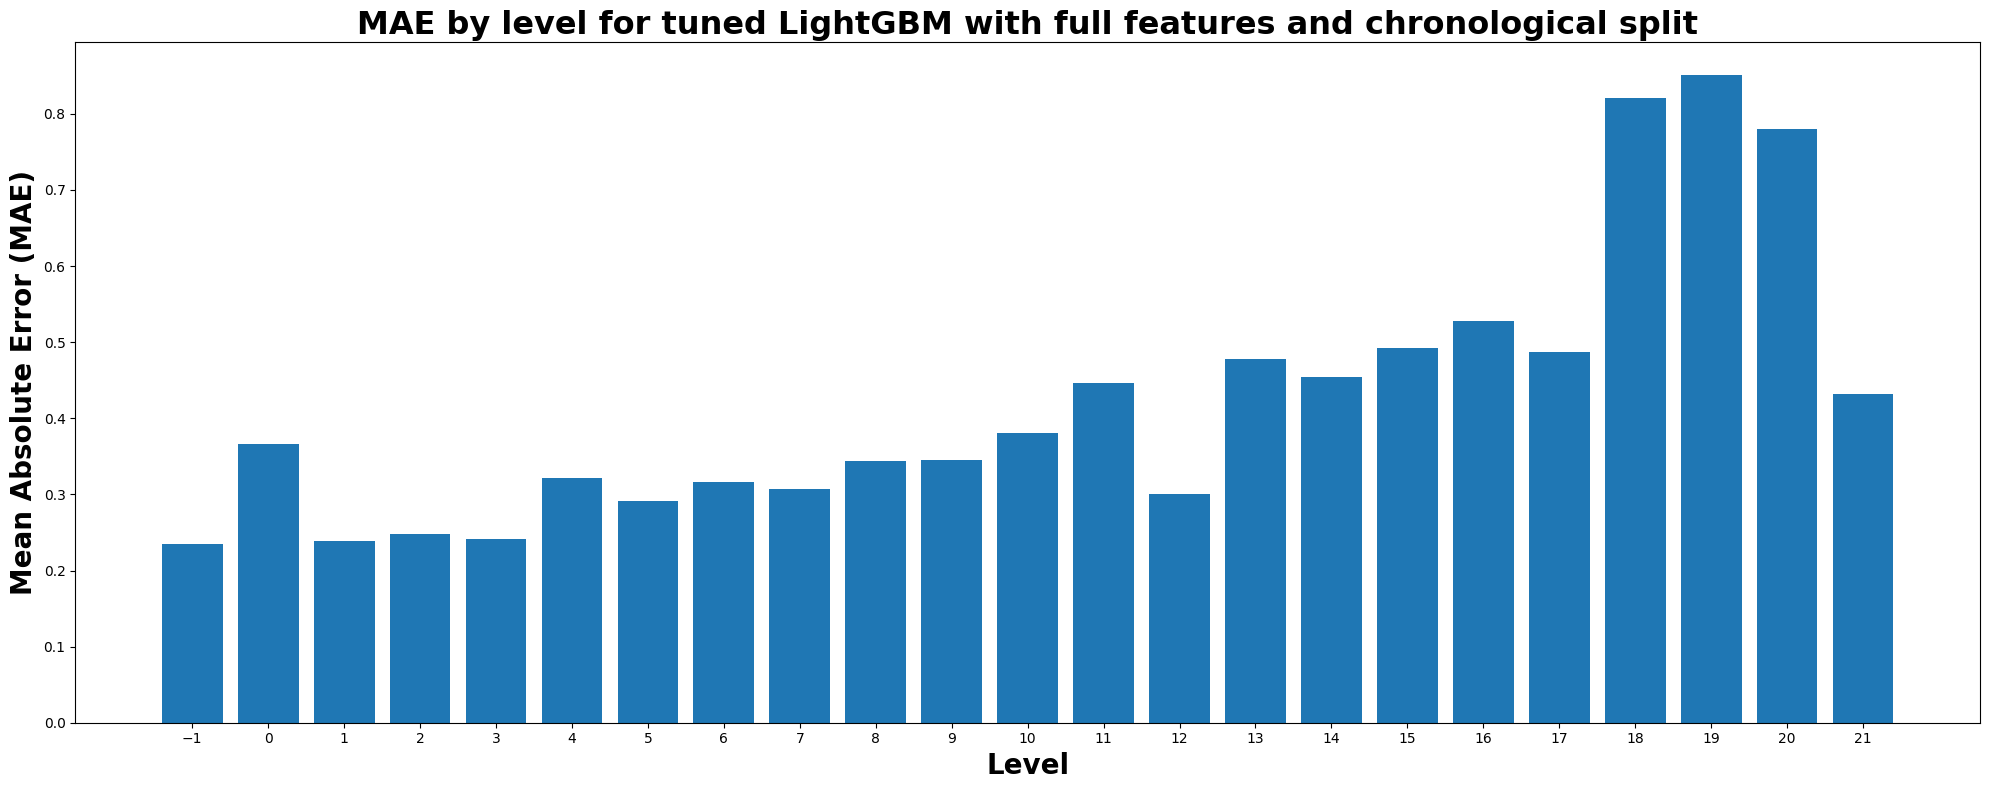

In [27]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and chronological split",
)

In [28]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.56

Round type: 0.5
RMSE: 0.59

Round type: 0.33
RMSE: 0.61

Round type: 0.45
RMSE: 0.59



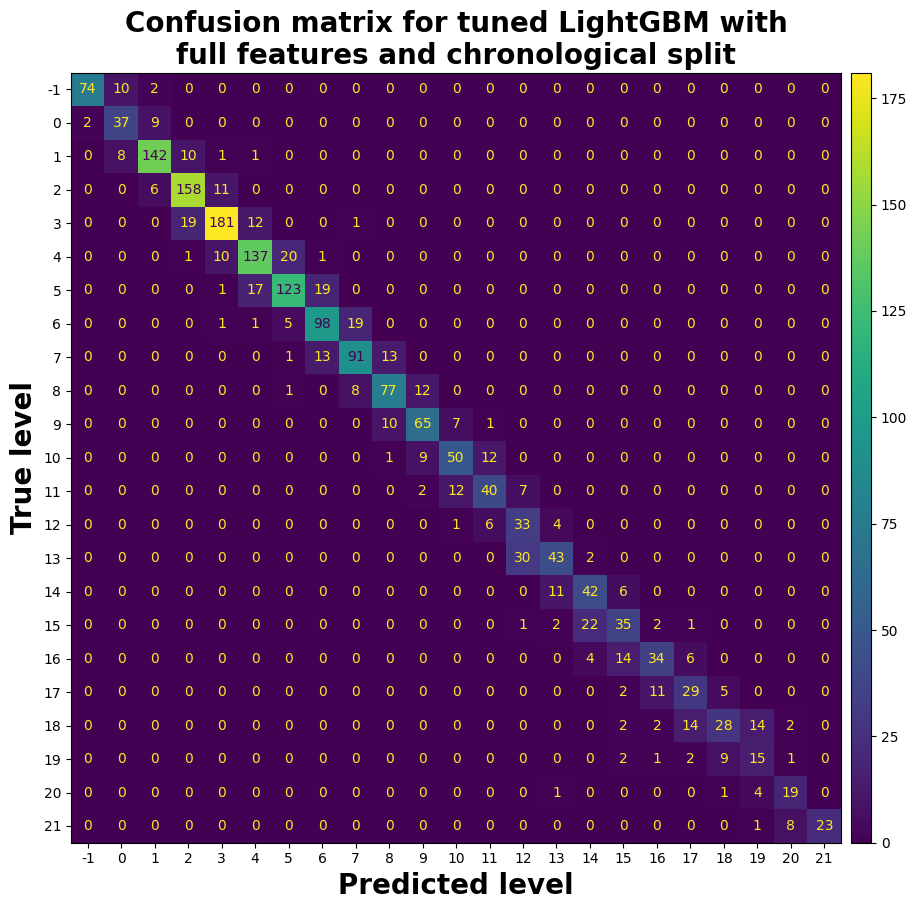

In [29]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and chronological split",
)

## Random split

In [30]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)
lgb_eval = lgb.Dataset(X_test_random_split, y_test_random_split, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2767, number of used features: 50
[LightGBM] [Info] Start training from score 7.220455
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.144298	valid_0's l1: 0.258236


In [31]:
y_pred_train = gbm.predict(X_train_random_split, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test_random_split, num_iteration=gbm.best_iteration)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.38
MAE: 0.26


In [33]:
results.loc[2] = ["random", "default", "full", rmse, mae]

###### MAE by level

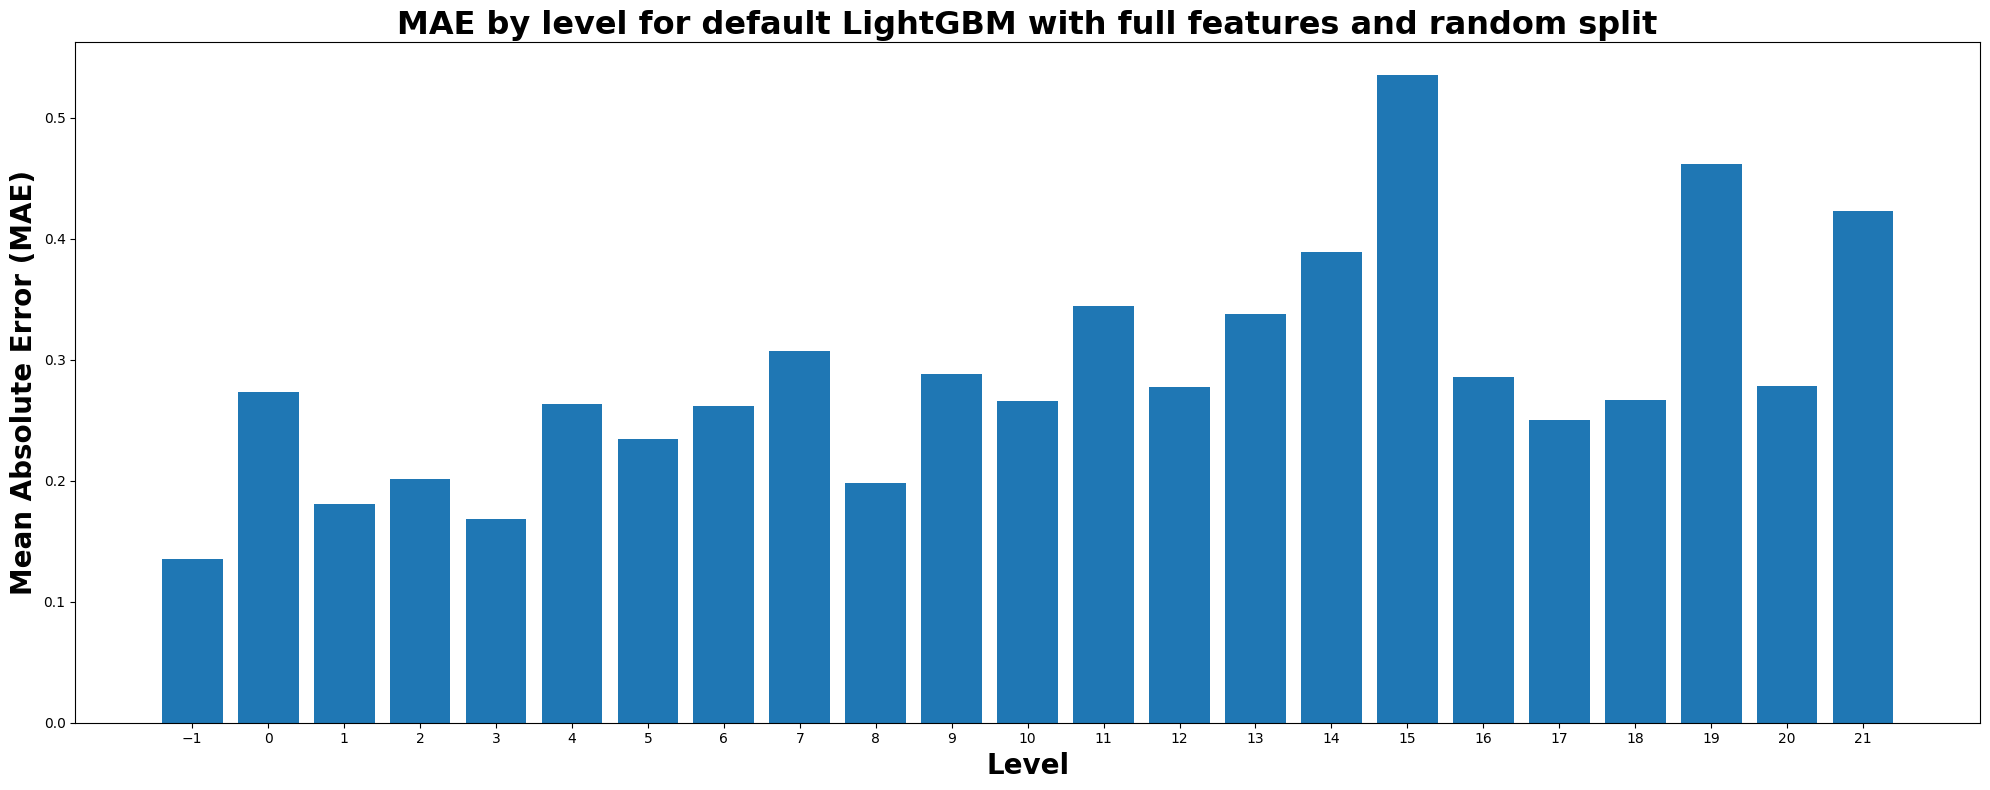

In [34]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for default LightGBM with full features and random split",
)

In [35]:
evaluate_round_predictions([0.5, 0.33, 0.45], y_test_random_split, y_pred_test)

Default:
RMSE: 0.38

Round type: 0.5
RMSE: 0.41

Round type: 0.33
RMSE: 0.45

Round type: 0.45
RMSE: 0.42



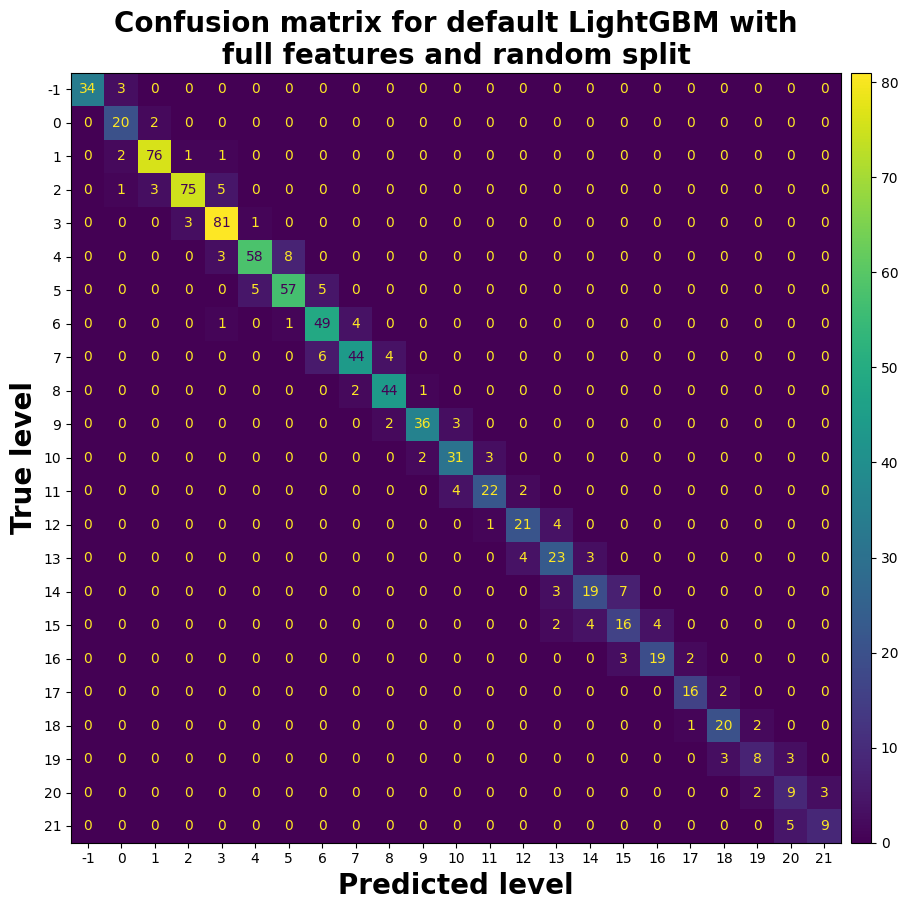

In [36]:
plot_confusion_matrix(
    y_pred_test,
    y_test_random_split,
    title="Confusion matrix for default LightGBM with\nfull features and random split",
)

### Tuning

In [37]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-26 20:22:15,103] A new study created in memory with name: no-name-910e4c90-179e-4a76-b5f5-124a0d242458
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.218069 + 0.0414204
[200]	cv_agg's l2: 0.213147 + 0.0400144
[300]	cv_agg's l2: 0.213259 + 0.0403043


feature_fraction, val_score: 0.212815:  14%|#4        | 1/7 [00:05<00:32,  5.36s/it]

Early stopping, best iteration is:
[257]	cv_agg's l2: 0.212815 + 0.0403512
[100]	cv_agg's l2: 0.219952 + 0.0593987
[200]	cv_agg's l2: 0.215513 + 0.0562747
[300]	cv_agg's l2: 0.216368 + 0.055343


feature_fraction, val_score: 0.212815:  29%|##8       | 2/7 [00:09<00:23,  4.75s/it]

Early stopping, best iteration is:
[257]	cv_agg's l2: 0.212815 + 0.0403512
[100]	cv_agg's l2: 0.216145 + 0.0507909
[200]	cv_agg's l2: 0.212804 + 0.0501022
[300]	cv_agg's l2: 0.213285 + 0.0501207


feature_fraction, val_score: 0.212322:  43%|####2     | 3/7 [00:14<00:18,  4.61s/it]

Early stopping, best iteration is:
[228]	cv_agg's l2: 0.212322 + 0.0498157
[100]	cv_agg's l2: 0.218583 + 0.0570272
[200]	cv_agg's l2: 0.216661 + 0.0556909
[300]	cv_agg's l2: 0.217277 + 0.0547333


feature_fraction, val_score: 0.212322:  57%|#####7    | 4/7 [00:18<00:13,  4.39s/it]

Early stopping, best iteration is:
[228]	cv_agg's l2: 0.212322 + 0.0498157
[100]	cv_agg's l2: 0.214729 + 0.0525661
[200]	cv_agg's l2: 0.21109 + 0.0519582


feature_fraction, val_score: 0.211070:  71%|#######1  | 5/7 [00:22<00:08,  4.39s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.223837 + 0.0390548
[200]	cv_agg's l2: 0.221653 + 0.0389416


feature_fraction, val_score: 0.211070:  86%|########5 | 6/7 [00:27<00:04,  4.66s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.219745 + 0.0605943
[200]	cv_agg's l2: 0.21635 + 0.0592294


feature_fraction, val_score: 0.211070: 100%|##########| 7/7 [00:31<00:00,  4.55s/it]


Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093


num_leaves, val_score: 0.211070:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245


num_leaves, val_score: 0.211070:   5%|5         | 1/20 [00:10<03:26, 10.86s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.213723 + 0.0561489
[200]	cv_agg's l2: 0.212767 + 0.0553291


num_leaves, val_score: 0.211070:  10%|#         | 2/20 [00:18<02:41,  8.97s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.218618 + 0.0577964
[200]	cv_agg's l2: 0.217838 + 0.0564899


num_leaves, val_score: 0.211070:  15%|#5        | 3/20 [00:26<02:23,  8.43s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245


num_leaves, val_score: 0.211070:  20%|##        | 4/20 [00:37<02:34,  9.65s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245


num_leaves, val_score: 0.211070:  25%|##5       | 5/20 [00:49<02:33, 10.23s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.32956 + 0.069871
[200]	cv_agg's l2: 0.291485 + 0.0616918


num_leaves, val_score: 0.211070:  30%|###       | 6/20 [00:49<01:37,  6.96s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245


num_leaves, val_score: 0.211070:  35%|###5      | 7/20 [00:56<01:27,  6.76s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245


num_leaves, val_score: 0.211070:  40%|####      | 8/20 [01:01<01:15,  6.33s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245


num_leaves, val_score: 0.211070:  45%|####5     | 9/20 [01:06<01:06,  6.02s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.220121 + 0.0602482
[200]	cv_agg's l2: 0.221091 + 0.0592894


num_leaves, val_score: 0.211070:  50%|#####     | 10/20 [01:11<00:55,  5.56s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.21107 + 0.0519093
[100]	cv_agg's l2: 0.217039 + 0.0474276
[200]	cv_agg's l2: 0.209171 + 0.0435579
[300]	cv_agg's l2: 0.208132 + 0.0436278
[400]	cv_agg's l2: 0.207513 + 0.0432224
[500]	cv_agg's l2: 0.20753 + 0.0428845


num_leaves, val_score: 0.207060:  55%|#####5    | 11/20 [01:14<00:43,  4.88s/it]

Early stopping, best iteration is:
[445]	cv_agg's l2: 0.20706 + 0.0428988
[100]	cv_agg's l2: 0.46834 + 0.0937417
[200]	cv_agg's l2: 0.401472 + 0.0908092
[300]	cv_agg's l2: 0.38243 + 0.0889167
[400]	cv_agg's l2: 0.373598 + 0.0875464


num_leaves, val_score: 0.207060:  60%|######    | 12/20 [01:15<00:28,  3.57s/it]

[500]	cv_agg's l2: 0.366709 + 0.0855377
Early stopping, best iteration is:
[445]	cv_agg's l2: 0.20706 + 0.0428988
[100]	cv_agg's l2: 0.214201 + 0.0538329
[200]	cv_agg's l2: 0.212795 + 0.052647
[300]	cv_agg's l2: 0.213479 + 0.0527367
[400]	cv_agg's l2: 0.214311 + 0.0522601
[500]	cv_agg's l2: 0.21531 + 0.0522634


num_leaves, val_score: 0.207060:  65%|######5   | 13/20 [01:20<00:28,  4.06s/it]

Early stopping, best iteration is:
[445]	cv_agg's l2: 0.20706 + 0.0428988
[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245
[300]	cv_agg's l2: 0.22251 + 0.0598417
[400]	cv_agg's l2: 0.222865 + 0.059511
[500]	cv_agg's l2: 0.223272 + 0.0592268


num_leaves, val_score: 0.207060:  70%|#######   | 14/20 [01:29<00:32,  5.44s/it]

Early stopping, best iteration is:
[445]	cv_agg's l2: 0.20706 + 0.0428988
[100]	cv_agg's l2: 0.221492 + 0.0619021
[200]	cv_agg's l2: 0.222275 + 0.0605245
[300]	cv_agg's l2: 0.22251 + 0.0598417
[400]	cv_agg's l2: 0.222865 + 0.059511
[500]	cv_agg's l2: 0.223272 + 0.0592268


num_leaves, val_score: 0.207060:  75%|#######5  | 15/20 [01:41<00:37,  7.42s/it]

Early stopping, best iteration is:
[445]	cv_agg's l2: 0.20706 + 0.0428988
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


num_leaves, val_score: 0.204069:  80%|########  | 16/20 [01:43<00:24,  6.01s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.213826 + 0.0570097
[200]	cv_agg's l2: 0.21213 + 0.0561721
[300]	cv_agg's l2: 0.212933 + 0.0552636


num_leaves, val_score: 0.204069:  85%|########5 | 17/20 [01:46<00:15,  5.15s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.213456 + 0.0444962
[200]	cv_agg's l2: 0.208151 + 0.0436826
[300]	cv_agg's l2: 0.206415 + 0.0423096


num_leaves, val_score: 0.204069:  90%|######### | 18/20 [01:49<00:08,  4.30s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.212466 + 0.0445448
[200]	cv_agg's l2: 0.209907 + 0.0430613
[300]	cv_agg's l2: 0.210817 + 0.0424523


num_leaves, val_score: 0.204069:  95%|#########5| 19/20 [01:51<00:03,  3.80s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.217245 + 0.0576893
[200]	cv_agg's l2: 0.216407 + 0.0565426
[300]	cv_agg's l2: 0.217152 + 0.0560967


num_leaves, val_score: 0.204069: 100%|##########| 20/20 [01:57<00:00,  5.89s/it]


Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886


bagging, val_score: 0.204069:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.214559 + 0.0539766
[200]	cv_agg's l2: 0.2098 + 0.0508498
[300]	cv_agg's l2: 0.209144 + 0.0494415


bagging, val_score: 0.204069:  10%|#         | 1/10 [00:07<01:05,  7.24s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.25325 + 0.06648
[200]	cv_agg's l2: 0.243763 + 0.0589459
[300]	cv_agg's l2: 0.240804 + 0.0581991


bagging, val_score: 0.204069:  20%|##        | 2/10 [00:13<00:53,  6.65s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.226803 + 0.0569607
[200]	cv_agg's l2: 0.223265 + 0.0537932
[300]	cv_agg's l2: 0.223149 + 0.0517682


bagging, val_score: 0.204069:  30%|###       | 3/10 [00:18<00:40,  5.78s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.220834 + 0.053643
[200]	cv_agg's l2: 0.216457 + 0.0522497
[300]	cv_agg's l2: 0.217349 + 0.0505359


bagging, val_score: 0.204069:  40%|####      | 4/10 [00:24<00:35,  5.84s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.213175 + 0.0515245
[200]	cv_agg's l2: 0.206908 + 0.0487722
[300]	cv_agg's l2: 0.206823 + 0.0477836


bagging, val_score: 0.204069:  50%|#####     | 5/10 [00:28<00:26,  5.26s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.215107 + 0.0499235
[200]	cv_agg's l2: 0.209805 + 0.046829
[300]	cv_agg's l2: 0.210661 + 0.0462569


bagging, val_score: 0.204069:  60%|######    | 6/10 [00:32<00:18,  4.71s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.215977 + 0.0557483
[200]	cv_agg's l2: 0.211255 + 0.0527885
[300]	cv_agg's l2: 0.211308 + 0.0520442


bagging, val_score: 0.204069:  70%|#######   | 7/10 [00:36<00:13,  4.50s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


bagging, val_score: 0.204069:  80%|########  | 8/10 [00:39<00:08,  4.14s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


bagging, val_score: 0.204069:  90%|######### | 9/10 [00:43<00:04,  4.00s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.212826 + 0.0528611
[200]	cv_agg's l2: 0.208528 + 0.0506421
[300]	cv_agg's l2: 0.209384 + 0.0491851


bagging, val_score: 0.204069: 100%|##########| 10/10 [00:47<00:00,  4.73s/it]


Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886


feature_fraction_stage2, val_score: 0.204069:   0%|          | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.216021 + 0.0523929
[200]	cv_agg's l2: 0.213081 + 0.0509191
[300]	cv_agg's l2: 0.213972 + 0.050721


feature_fraction_stage2, val_score: 0.204069:  17%|#6        | 1/6 [00:03<00:15,  3.02s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.215666 + 0.052248
[200]	cv_agg's l2: 0.213064 + 0.0502651
[300]	cv_agg's l2: 0.214669 + 0.0495324


feature_fraction_stage2, val_score: 0.204069:  33%|###3      | 2/6 [00:06<00:12,  3.24s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.217976 + 0.0494192
[200]	cv_agg's l2: 0.215336 + 0.0469215
[300]	cv_agg's l2: 0.215613 + 0.0464303


feature_fraction_stage2, val_score: 0.204069:  50%|#####     | 3/6 [00:09<00:09,  3.25s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.210809 + 0.0477369
[200]	cv_agg's l2: 0.206596 + 0.0464646
[300]	cv_agg's l2: 0.208096 + 0.0448149


feature_fraction_stage2, val_score: 0.204069:  67%|######6   | 4/6 [00:12<00:06,  3.18s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.222013 + 0.0570634
[200]	cv_agg's l2: 0.217154 + 0.0548475
[300]	cv_agg's l2: 0.217706 + 0.053562


feature_fraction_stage2, val_score: 0.204069:  83%|########3 | 5/6 [00:16<00:03,  3.43s/it]

Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886
[100]	cv_agg's l2: 0.217784 + 0.049482
[200]	cv_agg's l2: 0.214476 + 0.04791
[300]	cv_agg's l2: 0.215039 + 0.0471669


feature_fraction_stage2, val_score: 0.204069: 100%|##########| 6/6 [00:19<00:00,  3.33s/it]


Early stopping, best iteration is:
[236]	cv_agg's l2: 0.204069 + 0.0429886


regularization_factors, val_score: 0.204069:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.209365 + 0.0551769
[200]	cv_agg's l2: 0.203793 + 0.0528547
[300]	cv_agg's l2: 0.2035 + 0.0516665


regularization_factors, val_score: 0.202871:   5%|5         | 1/20 [00:04<01:32,  4.89s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.225906 + 0.064653
[200]	cv_agg's l2: 0.216737 + 0.0617503
[300]	cv_agg's l2: 0.215407 + 0.0608759


regularization_factors, val_score: 0.202871:  10%|#         | 2/20 [00:09<01:24,  4.71s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.209098 + 0.0495088
[200]	cv_agg's l2: 0.204406 + 0.0466328
[300]	cv_agg's l2: 0.205492 + 0.0450912


regularization_factors, val_score: 0.202871:  15%|#5        | 3/20 [00:15<01:31,  5.40s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.212113 + 0.0515823
[200]	cv_agg's l2: 0.207724 + 0.0489787
[300]	cv_agg's l2: 0.207811 + 0.0479025


regularization_factors, val_score: 0.202871:  20%|##        | 4/20 [00:19<01:19,  4.94s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.209637 + 0.0457932
[200]	cv_agg's l2: 0.205871 + 0.0430226
[300]	cv_agg's l2: 0.206581 + 0.0429869


regularization_factors, val_score: 0.202871:  25%|##5       | 5/20 [00:24<01:10,  4.71s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.212892 + 0.049616
[200]	cv_agg's l2: 0.208886 + 0.0462545
[300]	cv_agg's l2: 0.208455 + 0.0463538


regularization_factors, val_score: 0.202871:  30%|###       | 6/20 [00:27<01:00,  4.35s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871:  35%|###5      | 7/20 [00:33<01:03,  4.86s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871:  40%|####      | 8/20 [00:37<00:53,  4.42s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871:  45%|####5     | 9/20 [00:41<00:47,  4.30s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871:  50%|#####     | 10/20 [00:45<00:42,  4.30s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.209432 + 0.0445229
[200]	cv_agg's l2: 0.206984 + 0.0436234
[300]	cv_agg's l2: 0.206683 + 0.043017


regularization_factors, val_score: 0.202871:  55%|#####5    | 11/20 [00:49<00:37,  4.20s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871:  60%|######    | 12/20 [00:54<00:35,  4.38s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871:  65%|######5   | 13/20 [00:59<00:31,  4.54s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.209637 + 0.0457932
[200]	cv_agg's l2: 0.205871 + 0.0430226
[300]	cv_agg's l2: 0.20644 + 0.0427299


regularization_factors, val_score: 0.202871:  70%|#######   | 14/20 [01:02<00:25,  4.26s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.241168 + 0.0625126
[200]	cv_agg's l2: 0.23105 + 0.060647


regularization_factors, val_score: 0.202871:  75%|#######5  | 15/20 [01:04<00:17,  3.60s/it]

[300]	cv_agg's l2: 0.230687 + 0.0607223
Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.209082 + 0.045418
[200]	cv_agg's l2: 0.205773 + 0.0423493
[300]	cv_agg's l2: 0.205631 + 0.0413232


regularization_factors, val_score: 0.202871:  80%|########  | 16/20 [01:08<00:14,  3.68s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.224883 + 0.0651144
[200]	cv_agg's l2: 0.215304 + 0.060851
[300]	cv_agg's l2: 0.213806 + 0.0594488


regularization_factors, val_score: 0.202871:  85%|########5 | 17/20 [01:16<00:14,  4.77s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.209902 + 0.0458033
[200]	cv_agg's l2: 0.207385 + 0.0447235
[300]	cv_agg's l2: 0.20841 + 0.0445144


regularization_factors, val_score: 0.202871:  90%|######### | 18/20 [01:20<00:09,  4.59s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871:  95%|#########5| 19/20 [01:23<00:04,  4.29s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.208749 + 0.0462106
[200]	cv_agg's l2: 0.204268 + 0.0433583
[300]	cv_agg's l2: 0.204685 + 0.0421696


regularization_factors, val_score: 0.202871: 100%|##########| 20/20 [01:28<00:00,  4.43s/it]


Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711


min_data_in_leaf, val_score: 0.202871:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.213138 + 0.0553698
[200]	cv_agg's l2: 0.207164 + 0.0520259
[300]	cv_agg's l2: 0.20733 + 0.0509318


min_data_in_leaf, val_score: 0.202871:  20%|##        | 1/5 [00:03<00:13,  3.38s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.272645 + 0.0515015
[200]	cv_agg's l2: 0.248756 + 0.0473458
[300]	cv_agg's l2: 0.240084 + 0.0444703


min_data_in_leaf, val_score: 0.202871:  40%|####      | 2/5 [00:06<00:10,  3.38s/it]

Early stopping, best iteration is:
[276]	cv_agg's l2: 0.202871 + 0.0515711
[100]	cv_agg's l2: 0.206793 + 0.0553531
[200]	cv_agg's l2: 0.201529 + 0.0534601
[300]	cv_agg's l2: 0.201217 + 0.0539711
Early stopping, best iteration is:
[219]	cv_agg's l2: 0.201113 + 0.0537179


min_data_in_leaf, val_score: 0.201113:  60%|######    | 3/5 [00:10<00:06,  3.33s/it]

[100]	cv_agg's l2: 0.224525 + 0.0557099
[200]	cv_agg's l2: 0.213224 + 0.0512585


min_data_in_leaf, val_score: 0.201113:  80%|########  | 4/5 [00:12<00:03,  3.09s/it]

[300]	cv_agg's l2: 0.211366 + 0.050284
Early stopping, best iteration is:
[219]	cv_agg's l2: 0.201113 + 0.0537179
[100]	cv_agg's l2: 0.209334 + 0.050991
[200]	cv_agg's l2: 0.204859 + 0.0508589


min_data_in_leaf, val_score: 0.201113: 100%|##########| 5/5 [00:16<00:00,  3.23s/it]

[300]	cv_agg's l2: 0.204967 + 0.0500802
Early stopping, best iteration is:
[219]	cv_agg's l2: 0.201113 + 0.0537179


In [38]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.20111338231732642
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.022544079977704284
    lambda_l2: 2.7498855106986335
    num_leaves: 27
    feature_fraction: 0.8
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 10


In [39]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [40]:
rmse, mae = assess_regression_model(
    lgb_tuned,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.02
RMSE test: 0.37
MAE test: 0.24



In [41]:
results.loc[3] = ["random", "Optuna", "full", rmse, mae]

###### MAE by level

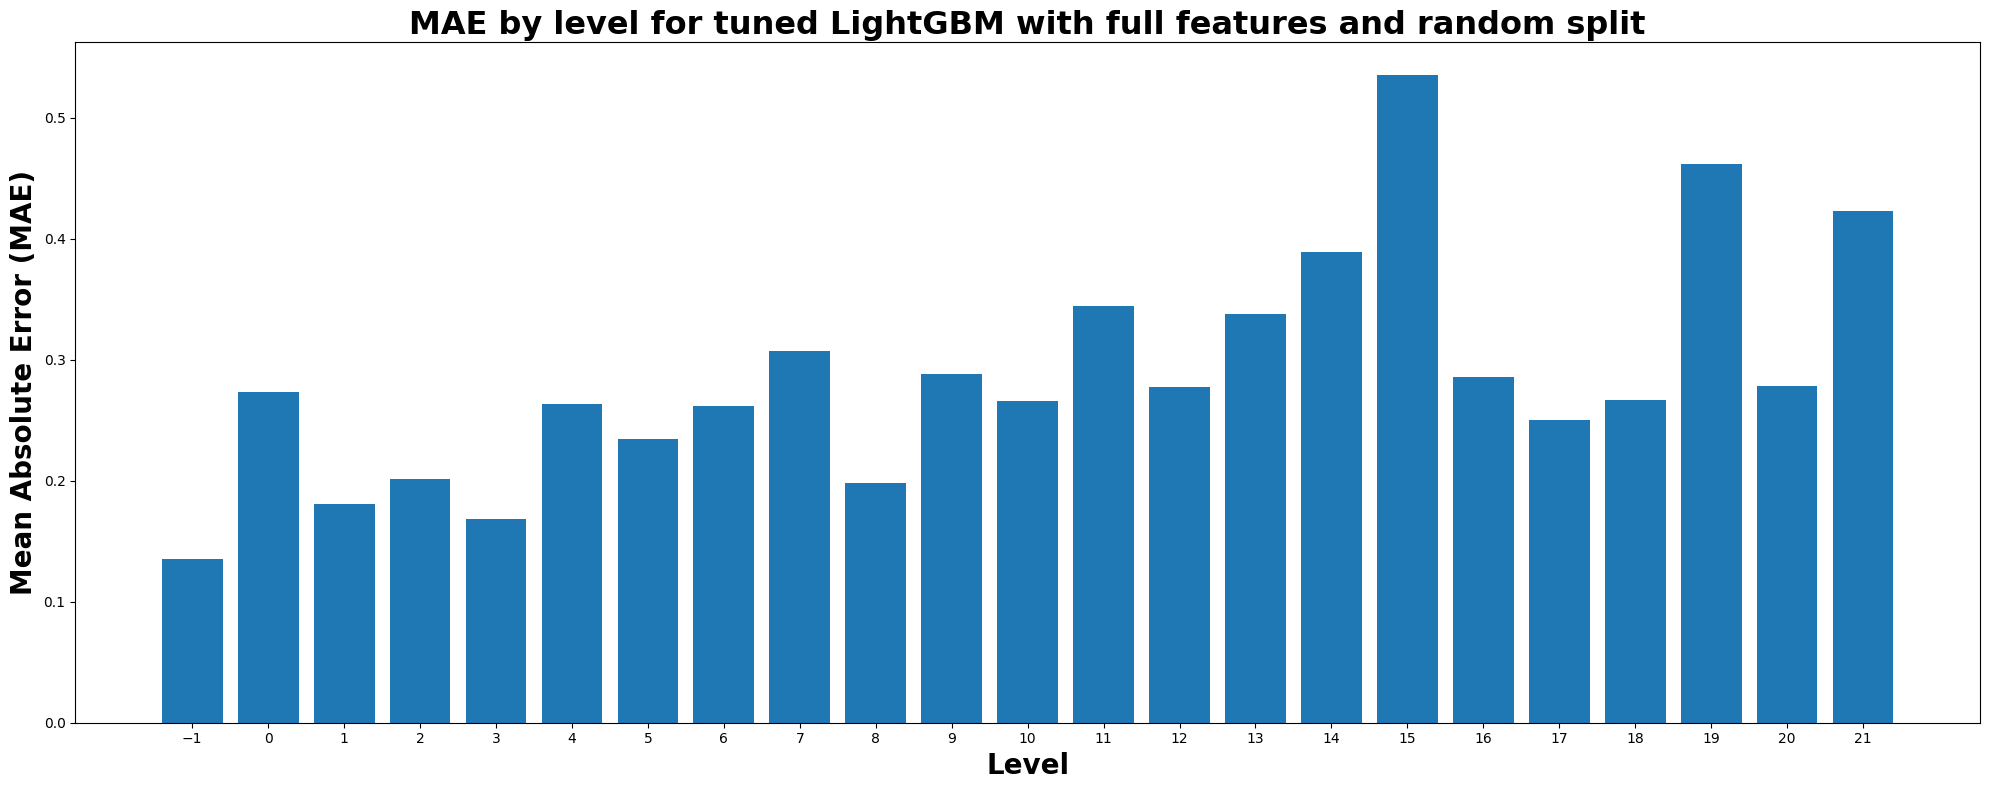

In [42]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for tuned LightGBM with full features and random split",
)

In [43]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.20

Round type: 0.5
RMSE: 0.21

Round type: 0.33
RMSE: 0.24

Round type: 0.45
RMSE: 0.22



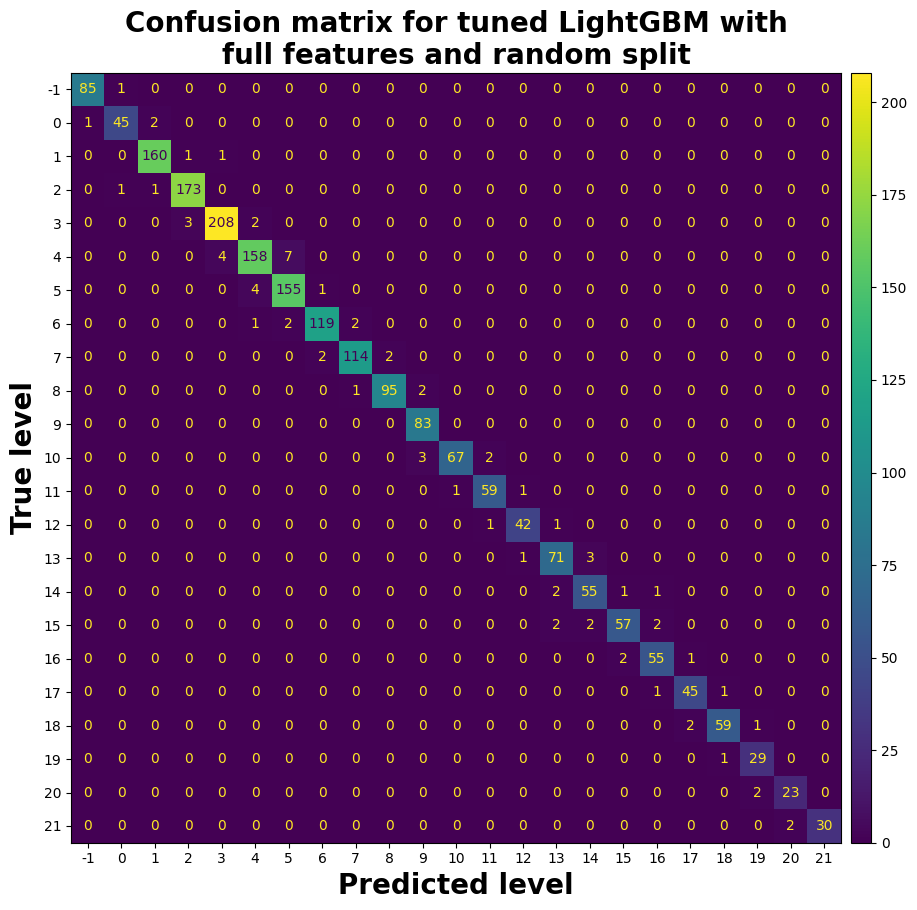

In [44]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nfull features and random split",
)

## Summary

In [45]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,full,0.596209,0.355989
1,chronological,Optuna,full,0.555080,0.351413
2,random,default,full,0.379865,0.258236
3,random,Optuna,full,0.369164,0.240205


In [46]:
from training.results import plot_summary

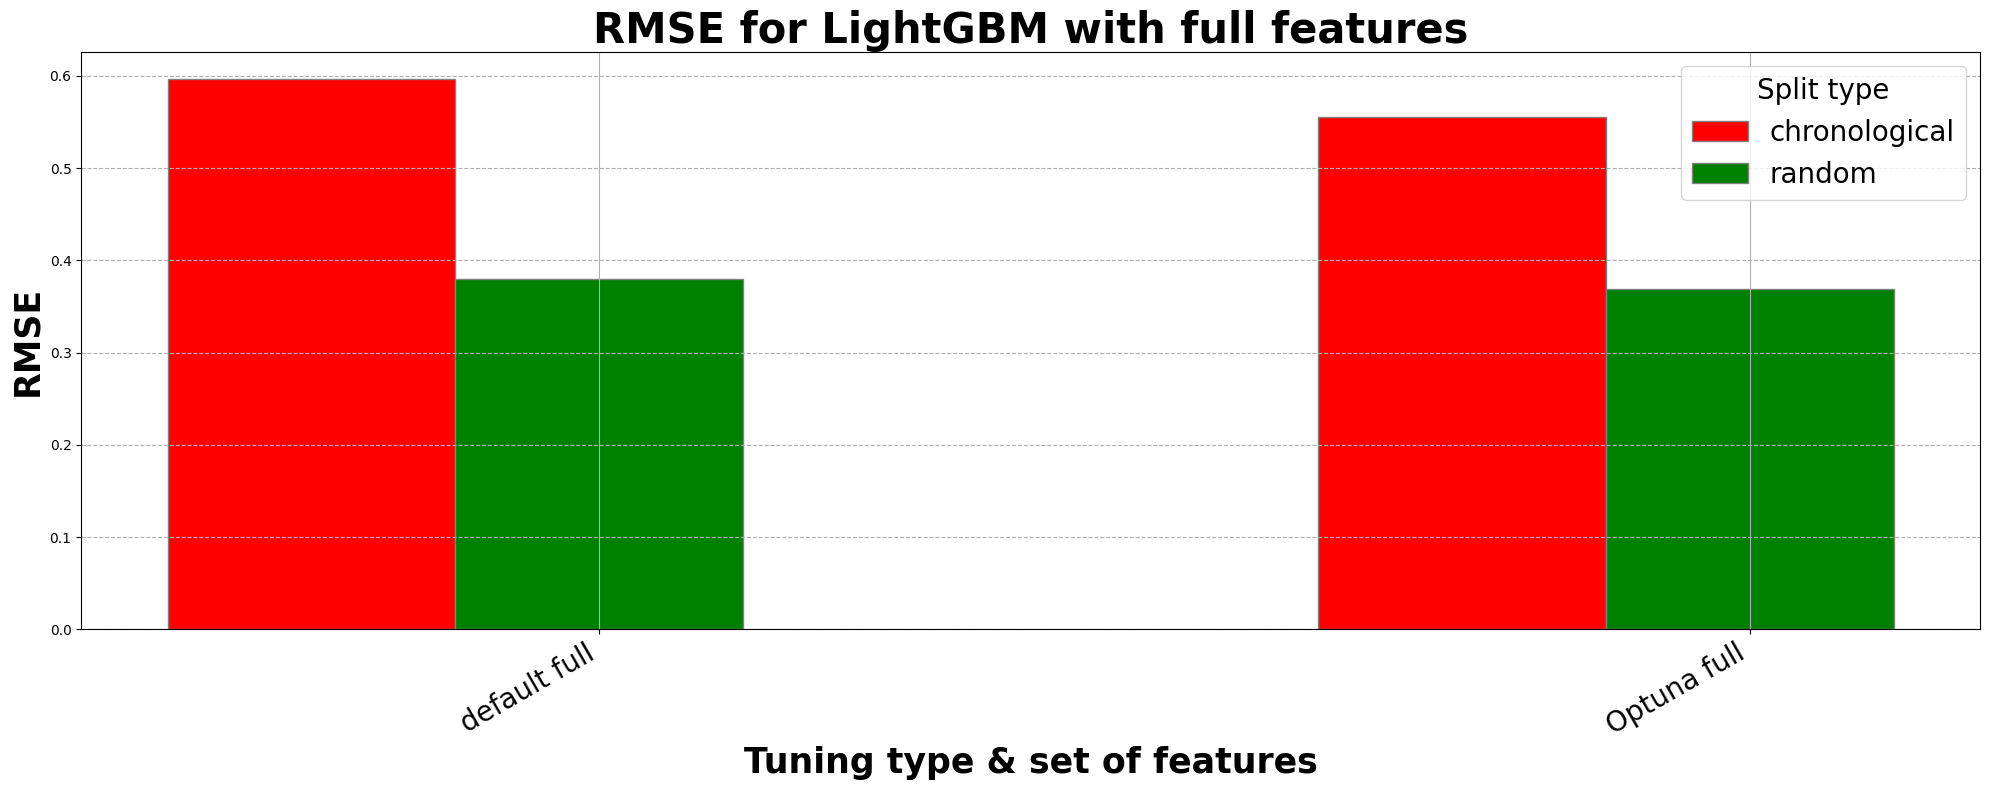

In [47]:
plot_summary(results, "RMSE", title="RMSE for LightGBM with full features")

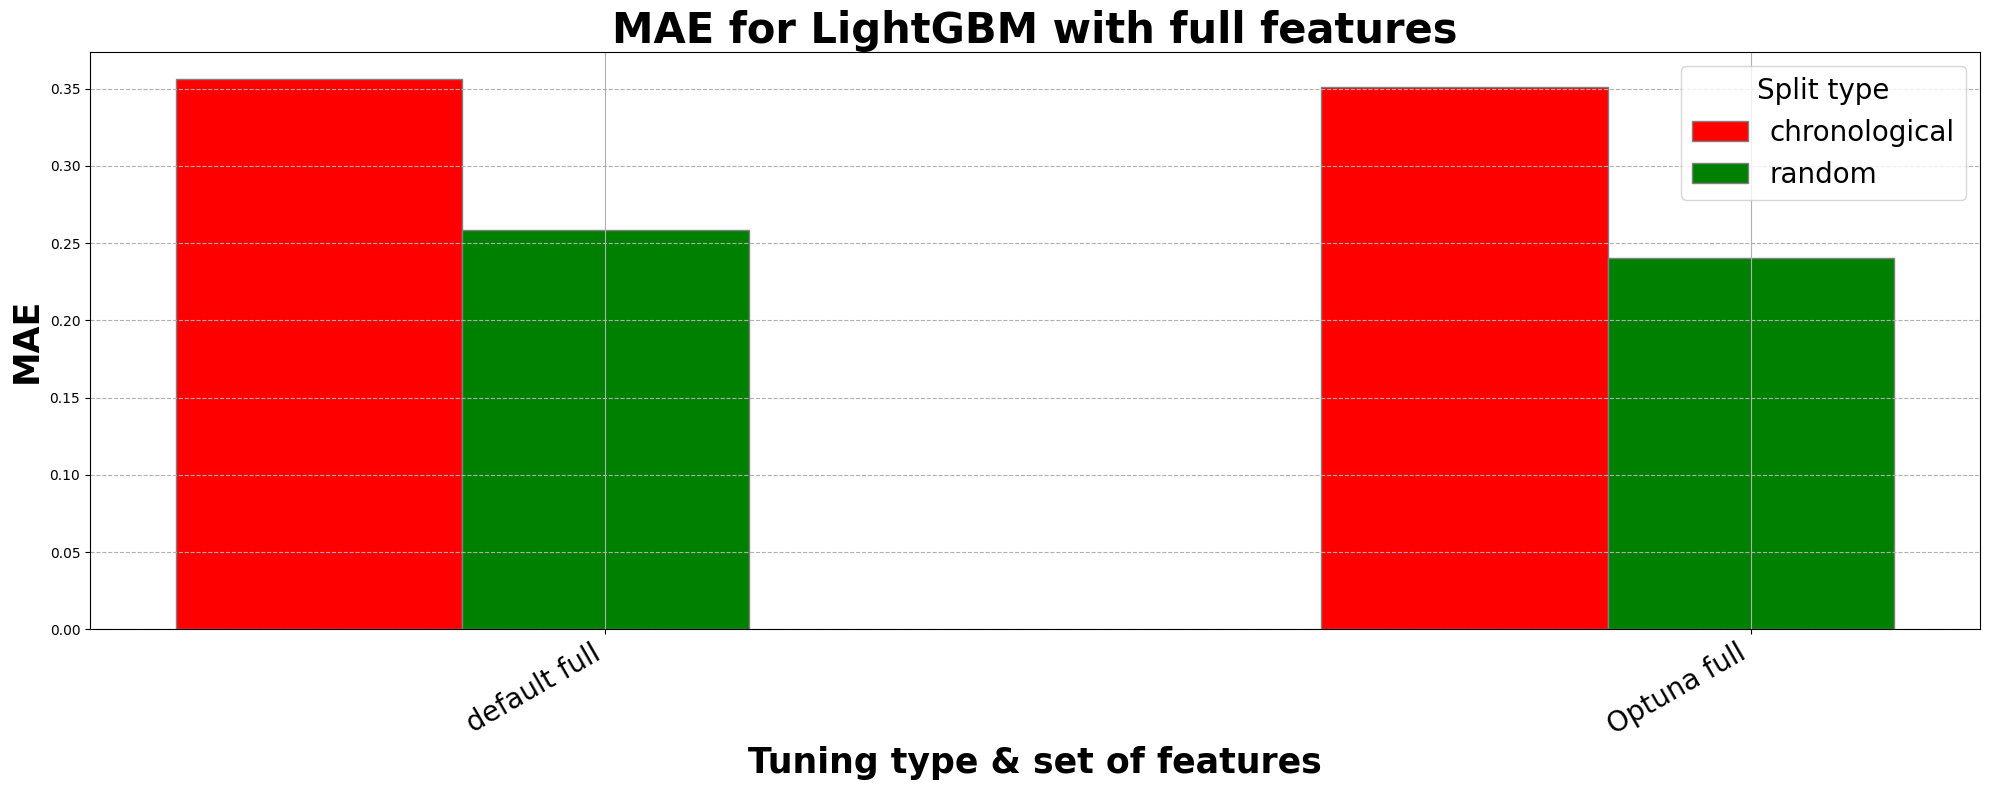

In [48]:
plot_summary(results, "MAE", title="MAE for LightGBM with full features")

In [49]:
results.to_csv("./lightgbm_full_results.csv")